# Linear Regression

When training a Machine Learning model, we need to get a good grasp of the data because the relation between input (X) and output (Y) variables can take many forms. These relations can be linear, non-linear... and the problems could also be of a different type: regression problems, where the output is a continuous value (like prices) and classification problems, where the model tries to predict the class to which the input variables correspond (like cancer/no-cancer, spam/not-spam).

Linear Regression Models are represented like the following:



But what if there were more input variables, needing more parameters?... m and b are not enough of course. The parameters, by convention, become "theta" ("weight" would be the same, just a different name). Each of them will be multiplied by the corresponding input variable x (NOTE: x_0 will always be 1). The formula used is the following:



Equations can get really tedious to write very quickly, even if they're just simple operations like multiplication and addition. This is where Linear Algebra starts coming into play. The above equation can be simplified even more using one simple vector operation: the dot product. When we have two vectors (arrays of values like x_0, x_1_ x_2... and theta_0, theta_1, theta_2...) and want to multiply each corresponding entry and then sum them all of those products up, we can use the dot product! We just need to have our values stored in arrays. The equation, now in a vectorized form, becomes this one:



That will be the final form of our hypothesis. Now comes the fun part! We'll be training a linear regression model and finding the best parameters for it. There are more things we have to take into account, the following image presents some of them:

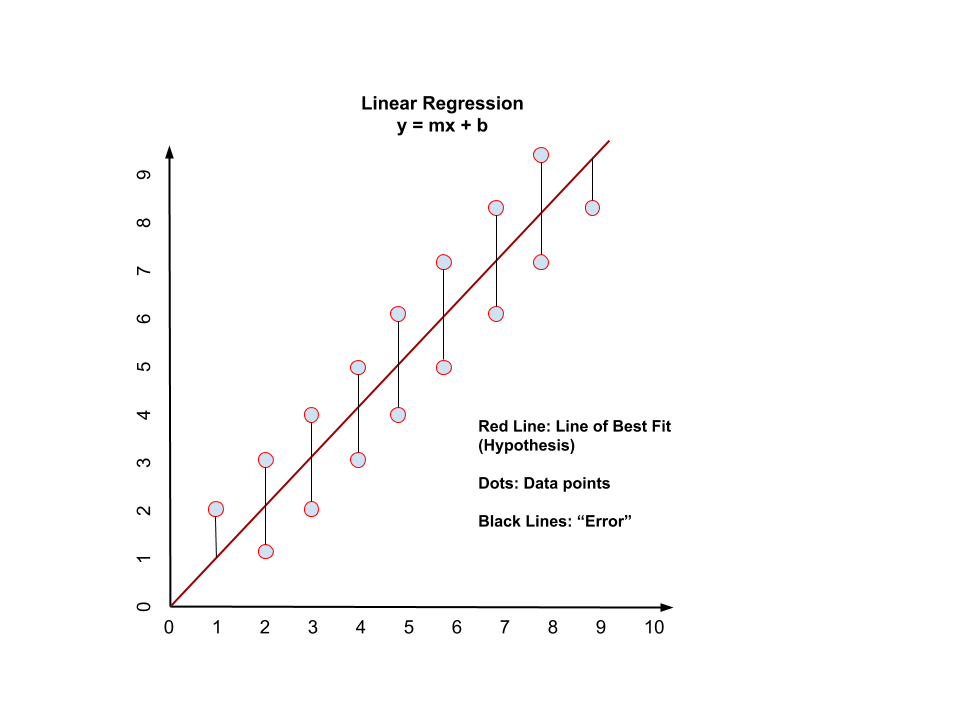

## 1. Getting Data

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


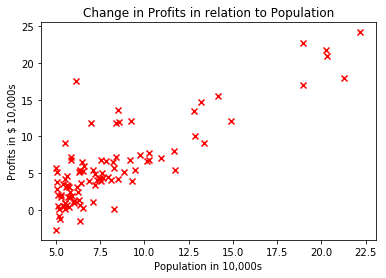

In [1]:
# Import some packages
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Extract data from .CSV file
data = pd.read_csv('datasets/food_truck.csv', header=0)

# Set input and output as separate variables
x = data[['Population']]
y = data[['Profits']]

# Visualize data - We can clearly see a linear correlation
plt.scatter(x['Population'], y['Profits'], color='red', marker='x')
plt.title('Change in Profits in relation to Population')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profits in $ 10,000s')
plt.show()

## 2. Preparing Data

We know our hypothesis must be in a specific form, so let's consider the following in order to prepare our data: 
    1. The letter "n" represents the number if input variables and the letter "m" corresponds to the number of training examples (each x, y pair within the dataset)
    2. There's only one input variable in X, which means our hypothesis will initially have n = 1 variables (x_1 and the parameter theta_1)
    3. Linear models always have a bias term, traditionally known as 'b', which in linear regression becomes 'theta_0'
    4. The bias term also needs an input variable to go with it, so that we can succesfully calculate the dot product of the vectors X and Theta. We will need to add a 'x_0' variable to X.
    5. 'x_0' will always be equal to one because the bias is supposed to stay the same no matter the input, otherwise, when multiplying the values, if x_0 is not 1, the bias will be affected.
    
Before going into the learning part, we have to insert a bias column to X, then create an initial theta vector to measure an initial error for our hypothesis.

In [2]:
# Up to this point, X consists of only one variable x_1
x.head()

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [3]:
# We'll add the intercept column x_0
x.insert(0, 'Intercept', 1)
x.head()

,Intercept,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [4]:
# Now that we're done with that, lets get the raw values from X, Y, and build an initial theta
x = x.values
y = y.values

# Theta is an (n, 1) vector, with all elements initialized to zero by convention
# Remember, n is the number of input variables (columns in X)
theta = np.zeros((x.shape[1], 1))

## 3. Measuring Cost

Whenever we start implementing Linear Regression, we'll usually start with a set of parameters that fit the data very poorly. By convention, we use a vector of zeros, which we want to change over time so that the hypothesis gets better and better at predicting whatever it is that we want to predict. When talking about "cost" we refer to the difference between the predicted values of the output and the expected values of the output. In other words, this is how far off our hypothesis' results are from the ones that are present on the dataset. Let's use a more visual approach to understand this:

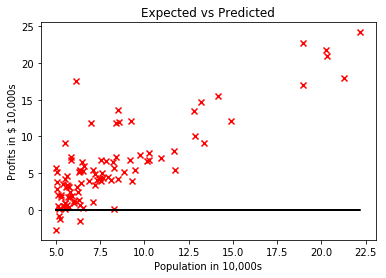

In [5]:
# This function displays the data points and then draws the line of predicted y's using theta
def plot_line(x, theta, y):
    plt.scatter(x[:, 1], y[:, 0], color='red', marker='x')
    plt.plot(x[:, 1], np.dot(x, theta), color='black')
    plt.title('Expected vs Predicted')
    plt.xlabel('Population in 10,000s')
    plt.ylabel('Profits in $ 10,000s')
    plt.show()


# Visualize the line with theta = 0, 0
plot_line(x, theta, y)

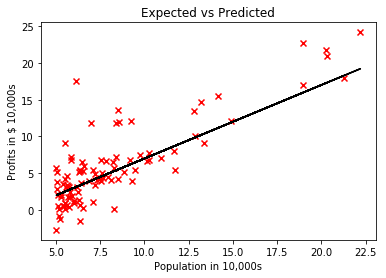

In [6]:
# The line given by theta 0, 0 obviously doesn't fit the data. Let's try something else:
plot_line(x, np.array([[-3], [1]]), y)

That's much better! The line clearly follows the general trend of the data. It is a very good approximation... but not good enough! How can we make sure we've found the best parameters to minimize the cost?... Using the cost function!

The cost function is a critical part of linear regression's implementation. It lets us find the best line that fits our data in a mathematical way. By applying the cost function to a specific dataset using different parameters, we'll get a value representing the magnitude of the difference between the predicted and expected Y's. The cost (error) will be different for even small changes in theta, and the lower the cost function's result is, the better!

As good as plots can be to understand what's going on, they will never be as exact and precise as a raw numerical value. Much more importantly, computers have an easier time dealing with only numbers, specially when the "learning" part starts.

The cost function we're going to be using is called "Mean Squared Error", one of the most popular ones for Linear Regression. It makes the following steps:

    1. Calculate the difference between every single pair of predicted Y and expected Y.
    2. Square the difference calculated on the previous step, to avoid negative values from affecting the final cost.
    3. Sum up all squared differences, to get an overall cost value for the data.
    4. Divide the overall cost value by 2 times the length of the data. Think of this as an averaging step.
    
At the end, we end up with a value representing the magnitude of our error. The number doesn't matter that much, what matters is that we get to (significantly) minimize it later on. Sometimes we'll get a very large number but find it is actually a low cost, and viceversa. The number returned by the cost function depends highly on the values of the dataset and the length of the dataset.

The Mean Squared Error Cost Function (which it's also referred to as J)is defined as:

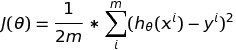

Remember we're using a vectorized implementation of Linear Regression, so the way we code the Cost Function in Python doesn't need any looping and we can forget about index values:

In [7]:
def cost(x, theta, y):
    return 1/(2*len(x)) * np.sum((np.dot(x, theta) - y) ** 2)


# Check the cost with parameters (theta) = 0, 0 and -3, 1
print('Cost with theta [0; 0]: {0}'.format(cost(x, theta, y)))
print('Cost with theta [-3; 1]: {0}'.format(cost(x, np.array([[-3], [1]]), y)))

Cost with theta [0; 0]: 32.072733877455676
Cost with theta [-3; 1]: 4.983860697569072


## 4. Learning

Learning is about finding the best parameters, the ones that minimize the cost function. So what do we do? Try a bunch of different thetas until we find one that has a low enough error? That doesn't sound appealing, and it would be very hard (if not impossible) to find the best theta that way in some cases.

There is an infinite number of thetas we can pick, which affect the final model and have different costs. How would a computer be able to pick the best values? Imagine this dataset only has one input variable for a moment and look at the following graph:

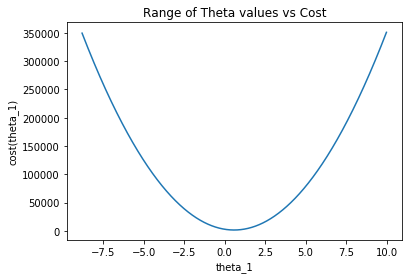

In [8]:
def plot_range_cost(x, y, range_start, range_end, step=0.1):
    theta_range = np.arange(range_start, range_end, step)
    costs = []
    for t in theta_range:
        costs.append(cost(x, t, y))
    plt.plot(theta_range, costs)
    plt.xlabel('theta_1')
    plt.ylabel('cost(theta_1)')
    plt.title('Range of Theta values vs Cost')

# Change in cost for different theta_1
plot_range_cost(x[:, 1], y, -8.8, 10, 0.01)

In the previous plot we can see the lowest cost corresponds to a theta_1 around 1. Values lower than one will get higher and higher costs, and values that are higher than one, will also get higher and higher costs. The plot looks like that because the Mean Squared Error is a quadratic function!

The optimization objective is to minimize the cost, which means we want theta to be equal to the value that returns the lowest cost possible. This right here is "learning" (for computers).

Imagine we start with theta_1 equal to -5... How do we get from there to 1? We'll use what is known as an Optimization Algorithm, in this case: Gradient Descent. Finding the minimum of a function (convergence) with Gradient Descent is pretty straightforward when done on Python, with vectorized variables. I will skip the inner details of the algorithm and the math, since I think there are lots of resources online where they're explained better.

There are some extra variables we'll use when running GD. They are called hyperparameters and for now, we'll need:

    1. Number of Iterations: Gradient Descent is an iterative algorithm, and it may take more iterations or "steps" depending on the dataset. We will be running the same operations over and over again, updating the parameters by each iteration, with the goal of ending up with a vector of theta that minimize the cost function.
    2. Learning Rate: each 'step' taken by the Gradient Descent Algorithm can be smaller or larger, depending on the programmer's preference. However, the Learning Rate has to be just right, so that the algorithm succesfully finds the minimum. If it is too small, Gradient Descent could take forever to converge or even not converge at all. If it is too large, the algorithm will fail to converge, since the gradient term will constantly overshoot the minimum and the parameters' values will get farther and farther away from it.
    
The general (vectorized) form of GD looks like this:
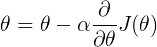

Once you derive the cost function J (the Mean Squared Error in this case) with respect to the parameters theta, you end up with:
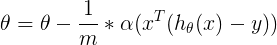

It may look slightly different from othe forms online, remember this is a vectorized function! Vectorization not only makes the code run faster, but also makes it much more readable:

In [14]:
def gradient_descent(x, theta, y, alpha, iterations):
    j_vals = np.zeros((iterations, 1))
    new_theta = np.copy(theta)

    # For every step of GD, we calculate new theta and also the cost
    for i in range(0, iterations):
        new_theta -= alpha/x.shape[0] * np.dot(x.T, (np.dot(x, new_theta) - y))
        j_vals[i] = cost(x, new_theta, y)

    # We return the new theta and the cost history
    return new_theta, j_vals

# Run GD
new_theta, cost_history = gradient_descent(x, theta, y, 0.01, 1500)
print('\nNew theta: [{0}; {1}]\n'.format(new_theta[0][0], new_theta[1][0]))
print('Cost with new theta: {0}'.format(cost_history[-1]))


New theta: [-3.63029143940436; 1.166362350335582]

Cost with new theta: [4.48338826]


## Predictions

Before making any prediction, let's make sure our learning algorithm has actually worked. One way to prove the parameters have a much lower cost than before, is to plot the cost history over time:

Text(0,0.5,'Cost')

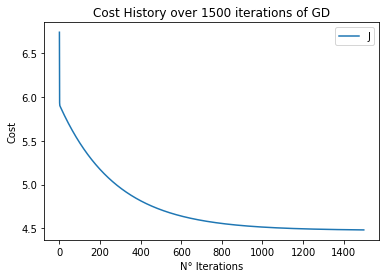

In [18]:
plt.plot(cost_history)
plt.title('Cost History over 1500 iterations of GD')
plt.legend('J')
plt.xlabel('N° Iterations')
plt.ylabel('Cost')

As you can see, we went from a very high cost, to a very low one. Let's plot the data points and the line given by our model. It should fit the data very well, since it is the line of best fit....

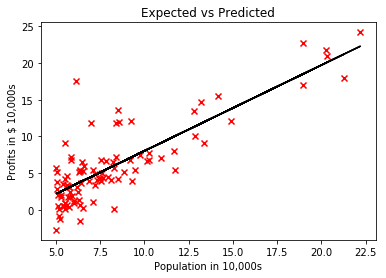

In [19]:
plot_line(x, new_theta, y)

Finally, if we want to predict new values, we just have to do the following:

In [21]:
def predict_profit(population, theta):
    # The first line calculates x * theta and then retrieves the value
    # The population is divided by ten thousand, like the training data
    return np.dot(np.array([[1, population/10000]]), theta)[0][0]

# Predicting profit for a population of 40000
prediction = predict_profit(40000, new_theta)
# The result must be multiplied by ten thousand
print('For a population of 40000, we predict a profit of {0}'.format(prediction * 10000))

For a population of 40000, we predict a profit of 10351.579619379678
